# Analiza porównawcza dwóch prób

### Statystyczna analiza danych
**dr inż. Wojciech Artichowicz**

**Katedra Geotechniki i Inżynierii Wodnej PG**

W praktyce inżynierskiej często zachodzi konieczność porównywania dwóch lub większej ilości zbiorowości. W tym celu wykorzystuje się m.in. statystykę opisową (charakterystyki, wykresy) oraz narzędzia statystyki matematycznej w postaci testów statystycznych. Poniżej przeprowadzona zostanie podstawowa analiza porównawcza stężenia naftalenu na podstawie wartości pobranych w dwóch miejscach oznaczonych jako A i B.

#### Dane
Dane są wartości stężenia naftalenu w osadzie dennym pomierzone w dwóch punktach rzeki. Wartości wyrażone są w mikrogramach na kilogram suchej masy [µg/kg sm]. 
Wartości pomiarów w punkcie $A$: 

$9{,}0;\;2{,}5;\;16{,}0;\;41{,}0;\;15{,}0;\;230{,}0;\;2{,}5;\;2{,}5;\;18{,}0;\;7{,}0;\;16{,}0$ [µg/kg sm] 

oraz w punkcie $B$: 

$44{,}0;\;28{,}0;\;26{,}0;\;2{,}5;\;15{,}0;\;18{,}0;\;22{,}0;\;37{,}0;\;12{,}0$ [µg/kg sm].

Dokonaj porównania stężenia naftalenu w tych punktach korzystając z metod statystyki opisowej i matematycznej.


### Import bibliotek języka Python

In [1]:
import numpy as np # tablice, macierze i algebra liniowa
import scipy.stats as st # biblioteka obliczeń statystycznych
import pandas as pd # obiekt ramki danych
import matplotlib.pyplot as plt # podstawowa wizualizacja
import seaborn as sns # zaawansowana wizualizacja danych

Utworzenie zmiennych w postaci tablic przechowujących dane:

In [2]:
A = np.array([ 9.0,  2.5, 16.0, 41.0, 15.0, 230.0,  2.5,  2.5, 18.0, 7.0, 16.0])
B = np.array([44.0, 28.0, 26.0,  2.5, 15.0,  18.0, 22.0, 37.0, 12.0])

### Statystyka opisowa z użyciem biblioteki [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)
Poniżej wykorzystane zostaną funkcje obliczające podstawowe charakterystyki dla obu prób. W tym celu wykorzystana zostanie biblioteka [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

Funkcją obliczajacą wiele podstawowych charakterystyk próby jest [`describe()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html#scipy.stats.describe). Wartości zwracane przez tę funkcję pozwalają na poznanie ogólnej charakterystyki obu prób i ewentualne wychwycenie różnic między próbami.

In [3]:
opisA = st.describe(A)
opisA

DescribeResult(nobs=11, minmax=(2.5, 230.0), mean=32.68181818181818, variance=4404.163636363635, skewness=2.7100959906150335, kurtosis=5.616840215985562)

In [4]:
opisB = st.describe(B)
opisB

DescribeResult(nobs=9, minmax=(2.5, 44.0), mean=22.72222222222222, variance=162.69444444444446, skewness=0.16979806715018642, kurtosis=-0.7052949422099739)

Aby ułatwić sobie porównywanie parametrów wygodnie jest umieścić otrzymane wyniki w obiekcie ramki danych, gdzie kolumny będą reprezentować porównywane próby, a wierszami będą kolejno wyznaczone parametry. Jako indeks ramki danych (tj. nazwy wierszy) należy przekazać nazwy parametrów obliczanych przez funkcję `describe()`. Nazwy te są przechowywane w polu o nazwie `_fields`. Poniżej zostaje utworzona i zapisana ramka danych zawierająca obliczone parametry.

In [5]:
df_opis = pd.DataFrame({"A":opisA, # utworzenie kolumny A
                        "B":opisB}, # utworzenie kolumny B
                        index=opisA._fields) # nadanie wierszom nazw
df_opis

,A,B
nobs,11,9
minmax,"(2.5, 230.0)","(2.5, 44.0)"
mean,32.681818,22.722222
variance,4404.163636,162.694444
skewness,2.710096,0.169798
kurtosis,5.61684,-0.705295


Na podstawie wyżej obliczonych charakterystyk łatwo można zauważyć, że próby się różnią. Szczególnie zwraca uwagę zakres wartości (minmax), który w obu próbach znacznie się różni. O ile zaobserwowane wartości minimalne są identyczne, to wartości maksymalne bardzo się różnią. Maksymalne stężenie naftalenu w punkcie A jest pięciokrotnie większe niż w punkcie B. Średnie wartości są różne, ale jednak zbliżone do siebie. Zatem możemy podejrzewać, że tak duża zaobserwowana wartość maksymalna w punkcie A jest daleka od wartości typowych. Przypuszczenie to może potwierdzić lub wykluczyć obliczenie mediany, czyli wartości dzielącej próbę na dwie równe połowy.

In [6]:
[np.median(A), np.median(B)]

[15.0, 22.0]

Aby ułatwić raportowanie warto dodać obliczone dodatkowo parametry (tzn. mediany) do istniejącej już ramki danych `df_opis`. W celu zaktualizaowania ramki danych z obliczonymi charakterystykami należy utworzyć nową ramkę danych zawierającą obliczone mediany. 

**Uwaga**: Należy zwrócić uwagę na to, żeby nazwy kolumn były identyczne jak w ramce danych, z którą będzie ona łączona. Ponadto wartości przekazane jako kolumny muszą być obiekatmi iterowalnymi (tzn. listami, krotkami, tablicami numpy, itp.), stąd umieszczenie wartości mediany w jednoelementowych listach, tzn.: `[np.median(A)]` oraz `[np.median(B)]`. 

In [7]:
df_median=pd.DataFrame({"A":[np.median(A)], # utworzenie kolumny A
                        "B":[np.median(B)]}, # utworzenie kolumny B
                       index=["median"]) # określenie nazwy wiersza
df_median

,A,B
median,15.0,22.0


W celu połączenia dwóch ramek danych można wykorzystać funkcję [`concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html). Ramki danych, które mają zostać połączone należy przekazać z użyciem listy tzn.: `[df_opis, df_median]`. Wynikowa ramka zostanie zapisana w zmiennej `df_opis`, tzn. zmienna `df_opis` zostanie nadpisana.

In [8]:
df_opis = pd.concat([df_opis,df_median])
df_opis

,A,B
nobs,11,9
minmax,"(2.5, 230.0)","(2.5, 44.0)"
mean,32.681818,22.722222
variance,4404.163636,162.694444
skewness,2.710096,0.169798
kurtosis,5.61684,-0.705295
median,15.0,22.0


Mediana steżenia naftalenu w punkcie A jest niższa niż w punkcie B. To zdaje się potwierdzać wcześniejsze przypuszczenie, że zaobserwowana wartość maksymalna w punkcie A może nie być wartością typową. Dodatkowo warto obliczyć odchylenie bezwzględne medianowe, które jest mało wrażliwe na wartości odstające. Jeśli wartości obliczone dla obu prób będą podobne to znaczy, że zaobserwowana wartość maksymalna w punkcie A jest wartością nietypową.

In [9]:
[st.median_abs_deviation(A), st.median_abs_deviation(B)]

[8.0, 7.0]

Rzeczywiście wartości bezwzględnego odchylenia medianowego w obu próbach są bardzo podobne, natomiast wariancje różnią się bardzo znacznie. Sugeruje to występowanie wartości silnie odstających w próbie z punktu A.

Poniżej w sposób identyczny jak poprzednio dodano obliczone wartości odchylenia medianowego do ramki danych `df_opis`.

In [10]:
df_opis = pd.concat([df_opis,
                     # utworzenie nowej ramki daneych zawierającej odchylenia medianowe
                     pd.DataFrame({"A":[st.median_abs_deviation(A)], # utworzenie kolumny A
                        "B":[st.median_abs_deviation(B)]}, # utworzenie kolumny B
                       index=["med abs dev"])])
df_opis

,A,B
nobs,11,9
minmax,"(2.5, 230.0)","(2.5, 44.0)"
mean,32.681818,22.722222
variance,4404.163636,162.694444
skewness,2.710096,0.169798
kurtosis,5.61684,-0.705295
median,15.0,22.0
med abs dev,8.0,7.0


### Wizualizacja danych

Graficzne przedstawienie wartości obecnych w próbie jest kluczowym elementem statystycznej analizy danych. W przypadku analizy porównawczej najbardziej efektywnym sposobem analizy jest użycie biblioteki [seaborn](https://seaborn.pydata.org/). 

W związku z tym, że obie próby są niewielkie stosowanie histogramów lub innych estymatorów gęstości prawdopodobieństwa nie ma większego sensu. W takim przypadku najlepszym sposobem wizualizacji jest stworzenie wykresów skrzynkowych oraz dodatkowo umieszczenie na wykresie wszystkich punktów pomiarowych. 

#### Format danych

Biblioteka [seaborn](https://seaborn.pydata.org/) wykorzystuje format danych tzw. *tabeli przestawnej* zapewniający dużą elastyczność analiz. W rozważanym tu przypadku analizie podlega jedna wartość (stężenie naftalenu) mierzona w dwóch punktach. Dla danych w takiej postaci format *tabeli przestawnej* oznacza połączenie wszystkich danych w jedną ramkę danych i dodanie do niej kolumny oznaczającej miejsce poboru próby. Efekt taki najłatwiej otrzymać tworząc osobne ramki danych dla każdego punktu i dodając do każdej z nich etykietę punktu, a następnie scalając je. Postępowanie takie przeprowadzono w komórce poniżej. Utwrozona ramka danych zawierać będzie dwie kolumny: `naftalen` i `punkt`.

In [11]:
dfA = pd.DataFrame({"naftalen":A}) # utworzenie ramki danych dla punktu A zawierającej jedną kolumnę naftalen
dfA["punkt"] ="A" # dodanie kolumny o nazwie punkt, w której wszystkie wartości są równe znakowi "A"

dfB = pd.DataFrame({"naftalen":B})  # utworzenie ramki danych dla punktu B zawierającej jedną kolumnę naftalen
dfB["punkt"] ="B"# dodanie kolumny o nazwie punkt, w której wszystkie wartości są równe znakowi "B"

df = pd.concat((dfA,dfB)) # połączenie wyżej utworzonych ramek danych
df # wypisanie ramki danych

,naftalen,punkt
0,9.0,A
1,2.5,A
2,16.0,A
3,41.0,A
4,15.0,A
5,230.0,A
6,2.5,A
7,2.5,A
8,18.0,A
9,7.0,A


#### Wykres skrzynkowy i wykres puntków
Poniżej wykorzystano dwie funkcje z biblioteki [seaborn](https://seaborn.pydata.org/): 
 - [`boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html) - tworzącą wykres skrzynkowy
 - [`stripplot()`](https://seaborn.pydata.org/generated/seaborn.stripplot.html) - tworzącą wykres punktowy dla każdej kategorii (tu etykiety punktu poboru prób)
 
Funkcje tworzące wykresy pobierają ramkę danych tj.: `data=df` oraz nazwę kolumny określającej wartości wykresu, tu kategorie mają zostać wyświetlone na osi $x$, natomiast wartości zmiennej na osi $y$. W związku z tym dla obu wykresów wartości $x$ i $y$ zostaną okreslone jako: `x="punkt"` oraz `y="naftalen"`.

W związku z tym, że oprócz wykresu skrzynkowego narysowane zostaną wszystkie punkty zaniechano zaznaczania obserwacji odstających na wykresie skrzynkowym. Opcją umożliwiajacą takie zachowanie jest `showfliers = False`. Natomiast aby uniknąć nakładania się punktów tworzonych przy pomocy funkcji `stripplot` użyto rozrzucenia punktów w pozimie. W tym celu użyto opcji `jitter=0.025`. Wartość przemieszczenia poziomego nie ma znaczenia, jest to jedynie element wizualizacji.

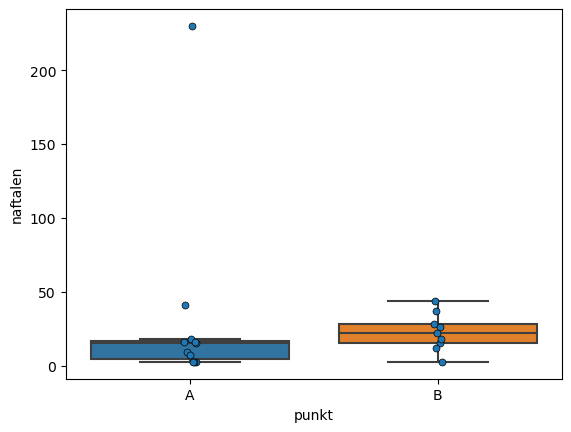

In [12]:
ax = sns.boxplot(data=df,x="punkt",y="naftalen",showfliers = False)
sns.stripplot(data=df,x="punkt",y="naftalen",jitter=0.025,edgecolor="black",linewidth=0.5,ax=ax)
pass

Jak można zauważyć, wizualizacja potwirdziła występowanie obsrwacji odstających w punkcie A. Wystąpienie takiego stanu jest bardzo istotną kwestią i wymagane byłoby jej wyjaśnienie. 

Niestety obserwacje odstające powodują, że główna część wykresu nie jest zbyt dobrze widoczna. Aby temu zaradzić, można zmienić zakres osi prezentującej steżenie naftalenu. Cel ten można osiągnąć używając następującej funkcji `ax.set_ylim(0,50)` (oś będzie mieć zakres wartości od 0 do 50 jednostek). Poniżej zaprezentowano wykresy przy zmienionym zakresie osi $y$.

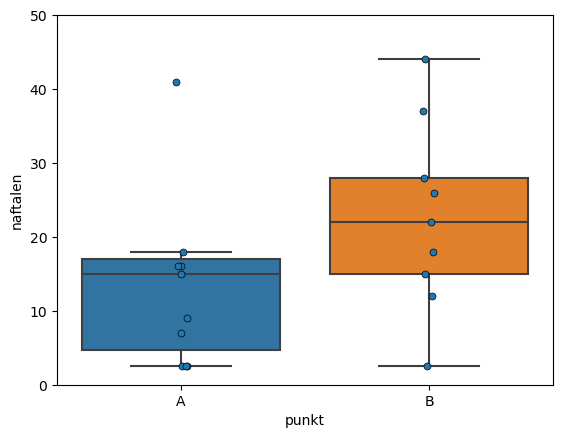

In [13]:
ax = sns.boxplot(data=df,x="punkt",y="naftalen",showfliers = False)
sns.stripplot(data=df,x="punkt",y="naftalen",jitter=0.025,edgecolor="black",linewidth=0.5,ax=ax)
ax.set_ylim(0,50) # zmiana zakresu osi y
pass

### Porównanie prób przy użyciu testów statystycznych

Testy statystyczne umożliwiają sprawdzenie na podstawie dostępnych danych (prób) różnych hipotez statystycznych. W tym przypadku sprawdzona zostanie hipoteza o równości średnich wartości w obu zbiorowościach. Klasycznym testem służącym do porównania średnich jest test T ([`ttest_ind()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind)). Jednak wymaga on spełnienia założenia o tym, że obie próby pochodzą ze zbiorowości o rozkładach normalnych. W przypadku tak małych prób określenie tego może być kłopotliwe.

Obecnie najchętniej stosowaną techniką w testowaniu hipotez jest zastosowanie testów perumtacyjnych. Ten rodzaj testu dostępny jest w bibliotece `scipy.stats` jako [`permutation_test`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.permutation_test.html#scipy.stats.permutation_test). Tego typu testy nie wymagają spełnienia żadnych założeń. Jednak należy pamiętać, że w analizowanym tu przypadku próby są niewielkie i wyniki mogą być obarczone dużą niepewnością.

Funkcja realizująca test permutacyjny wymaga przekazania trzech argumentów:
 1. Dane w postaci krotki zawierającej wektory danych dla każdej z prób
 2. Badaną statystykę - tu jest ona przekazana w postaci dodatkowej funkcji o nazwie `statystyka()`. Funkcja ta oblicza wartość różnicy między średnimi.
 3. Postać hipotezy alternatywnej (argument `alternative`). Tu przekazana jest hipotez alternatywna `"two-sided"` oznacza badanie różnicy między średnimi w obu kierunkach (mniejsze / większe). 
 
Jeśli zwrócona przez test wartość `pvalue` jest mała (umownie: poniżej 0,05) to hipotezę zerową mówiącą, że brak jest różnic między średnimi należy odrzucić. Jeśli wartość `pvalue` jest duża (umownie: powyżej 0,05) to brak jest podstaw do odrzucenia hipotezy zerowej i można uznać, że nie ma istotnych różnic między średnimi.

In [14]:
def statystyka(a,b):
    return st.tmean(a)-st.tmean(b)

st.permutation_test((A,B),statystyka,alternative="two-sided").pvalue

0.9686

Wartość `pvalue` zwrócona przez test permutacyjny dla dwóch średnich jest znacznei większa niż $0,05$. Należy jednak zwrócić uwagę na fakt, że w próbie A najprawdopodobniej znajduje się obserwacja odstająca (silnie wpływająca na średnią) oraz że próby są niewielkie. W przypadku niewielkich prób wpływ losowości na wartości statystyk (np. średniej) jest duży. 

Reasumując, wynik testu można zinterpretować następująco: na podstawie dostępnych danych nie można stwierdzić, że próby pochodzą ze zbiorowości o różnych średnich. Równie dobrze mogą pochodzić ze zbiorowości o takiej samej średniej. Prawdopodobieństwo, że zaobserwowane różnice między średnimi są czysto losowe wynosi $p=$`pvalue`.

Poniżej przeprowadzono test statystyczny dla dwóch median. Co prawda zwrócona wartość `pvalue` jest znacznie niższa niż w przypadku średnich, jednak w dalszym ciągu należy uznać, że różnica między medianami w próbach może być czysto losowa (prawdopodobieństwo wystąpienia takiej sytuacji to $p$=`pvalue`).

In [15]:
def statystyka(a,b):
    return np.median(a)-np.median(b)

st.permutation_test((A,B),statystyka,alternative="two-sided").pvalue

0.1868

### Wnioski

Na podstawie powyższej analizy można sformułować następujące wnioski:
 - Stężenie naftalenu w punkcie A jest niższe niż w punkcie B. Wynika to z niższej mediany oraz wykresów skrzynkowych, w których zakres typowych wartości jest niższy dla punktu A. 
 - W punkcie A zaobserwowano wartości nietypowo wysokie. Fakt ten sposowodał znaczne zawyżenie średniej i wariancji (i odchylenia standardowego).
 - Przy tej liczbie obserwacji nie udało się potwierdzić testem statystycznym, że próby rzeczywiście pochodzą z rozkładów o różnych średnich lub medianach. W celu rozstrzygnięcia konieczne byłoby posłużenie się próbami o większej liczności.